In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
SleepStress = pd.read_csv('SaYoPillow.csv')
SleepStress.head()
#sr.使用者打鼾範圍     rr.呼吸頻率      t.體溫      lm.肢體運動速率      bo.血氧水平      rem.眼球運動      sr.1.壓力程度      hr.睡眠時數      sl.心律和壓力水平

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


SleepStress.info()

In [6]:
SleepStress['sl'].value_counts()

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

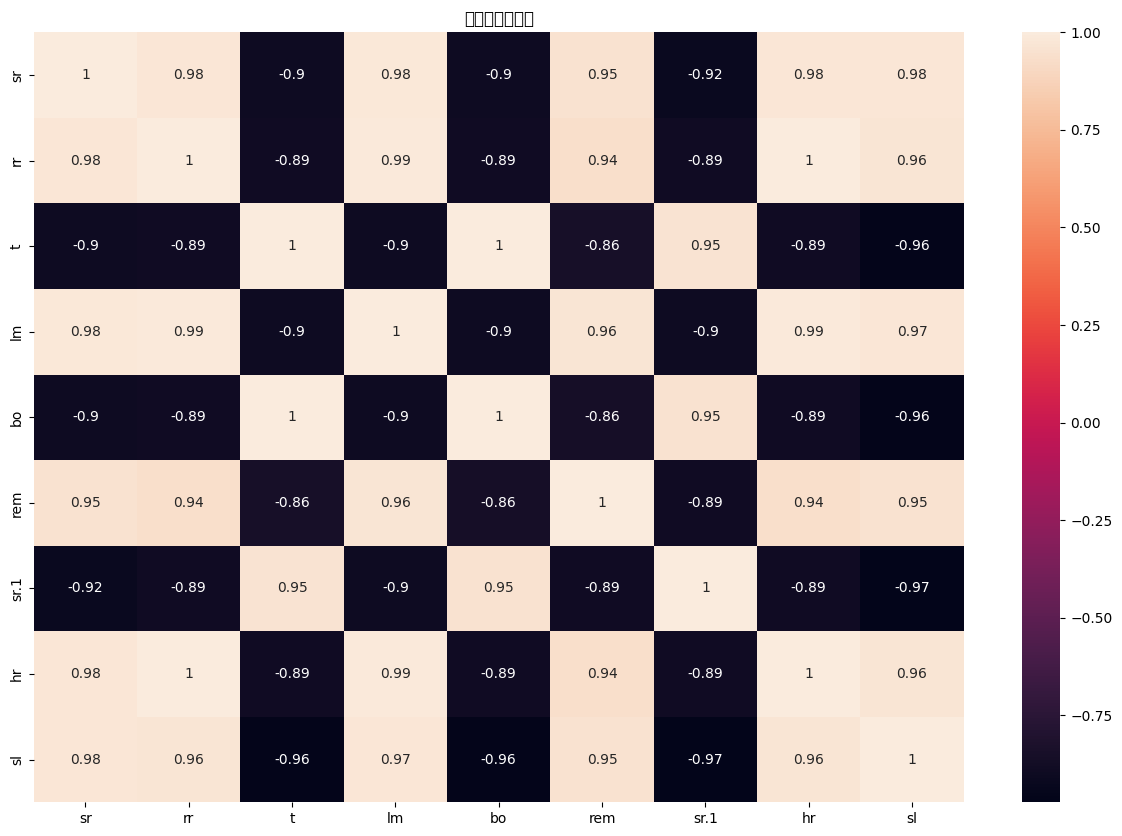

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(SleepStress.corr(),annot=True)
plt.title('變數相關性熱圖')
plt.show()

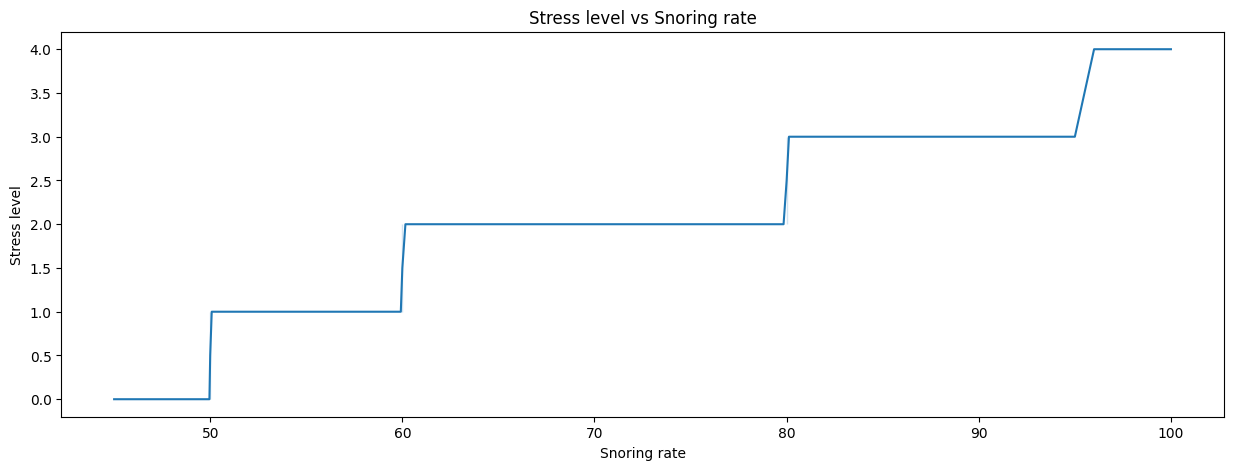

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(x='sr',y='sl',data=SleepStress)
plt.title('Stress level vs Snoring rate')#壓力水平與打鼾
plt.ylabel('Stress level')#壓力水平
plt.xlabel('Snoring rate')#打鼾
plt.show()

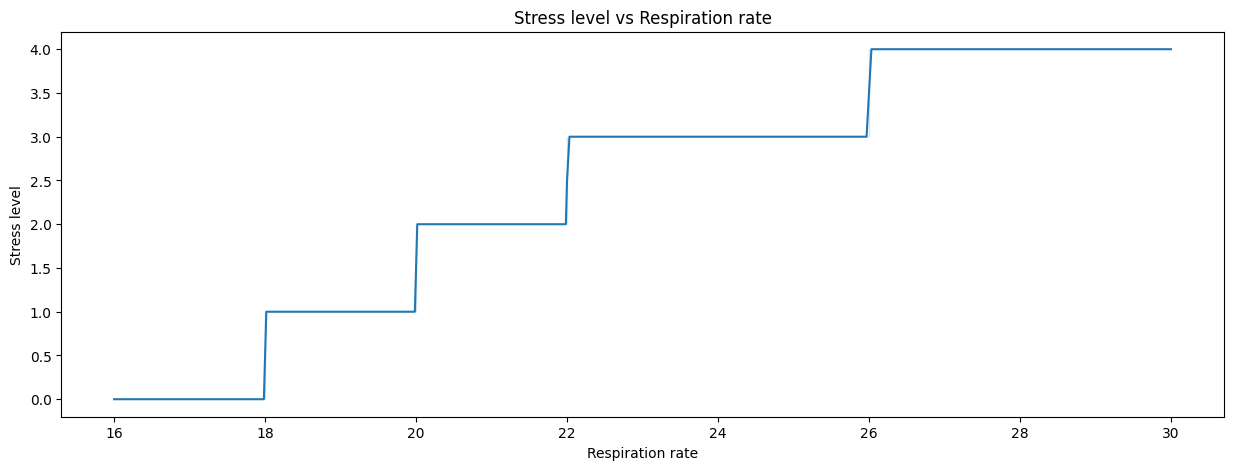

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x='rr',y='sl',data=SleepStress)
plt.title('Stress level vs Respiration rate')
plt.ylabel('Stress level')#壓力水平
plt.xlabel('Respiration rate')#呼吸頻率
plt.show()

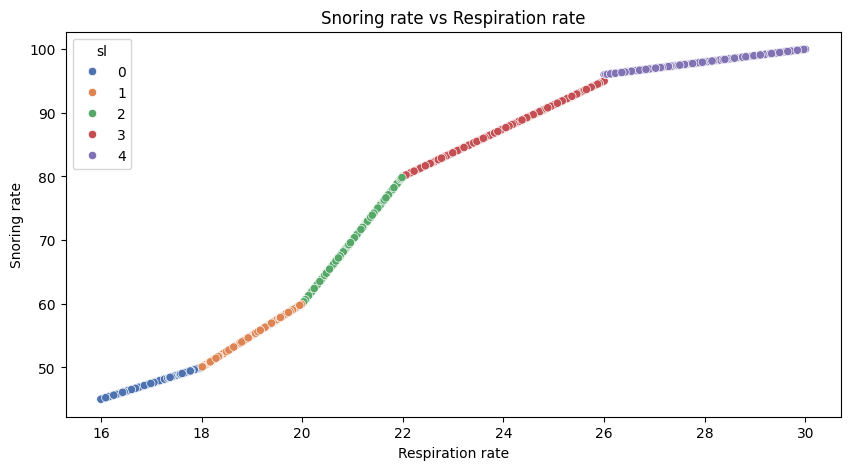

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='rr',y='sr',data=SleepStress,hue='sl',palette='deep')
plt.title('Snoring rate vs Respiration rate')
plt.ylabel('Snoring rate')#打鼾
plt.xlabel('Respiration rate')#呼吸頻率
plt.show()

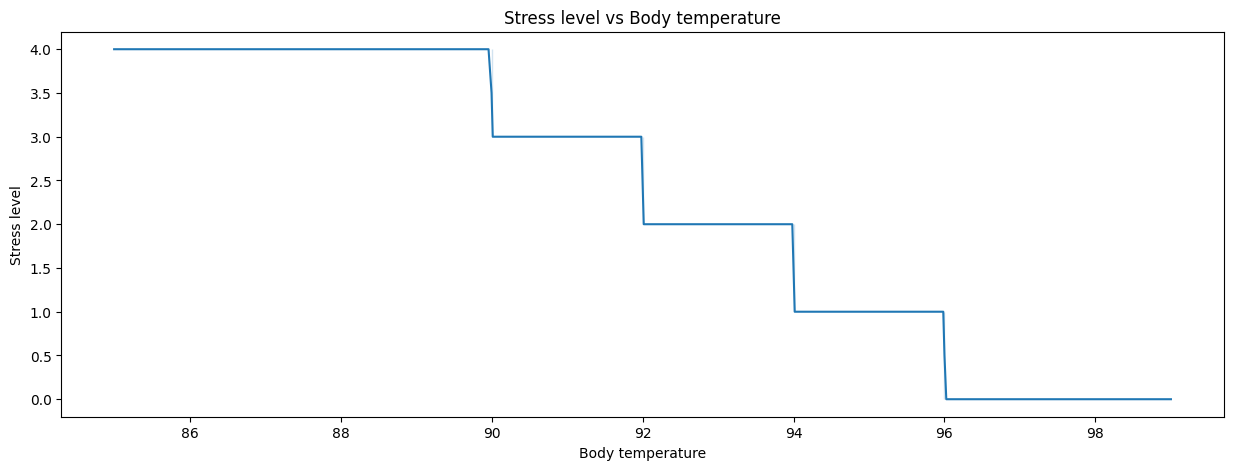

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(x='t',y='sl',data=SleepStress)
plt.title('Stress level vs Body temperature')
plt.ylabel('Stress level')#壓力水平
plt.xlabel('Body temperature')#體溫
plt.show()


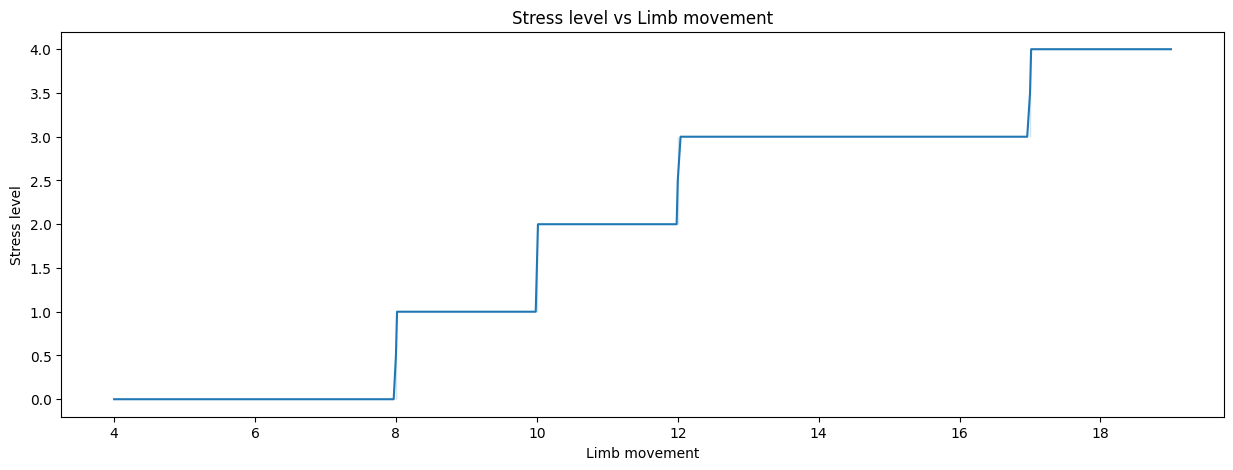

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x='lm',y='sl',data=SleepStress)
plt.title('Stress level vs Limb movement')
plt.ylabel('Stress level')#壓力水平
plt.xlabel('Limb movement')#肢體運動
plt.show()

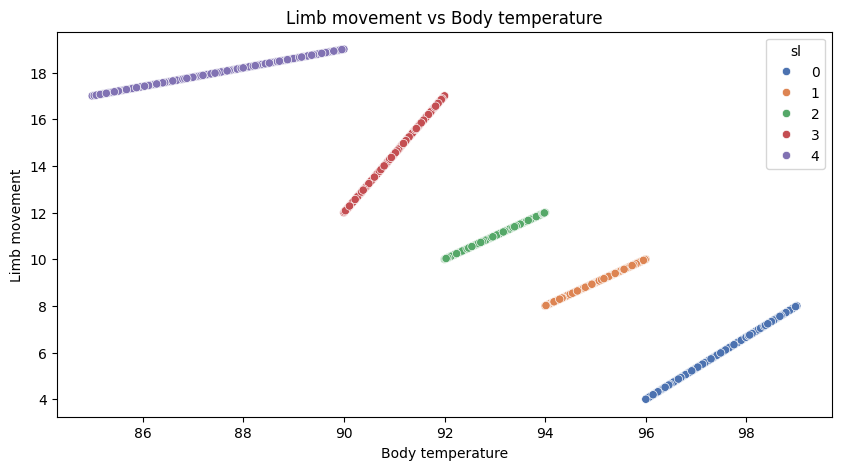

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='lm',x='t',data=SleepStress,hue='sl',palette='deep')
plt.title('Limb movement vs Body temperature')
plt.ylabel('Limb movement')
plt.xlabel('Body temperature')#體溫
plt.show()

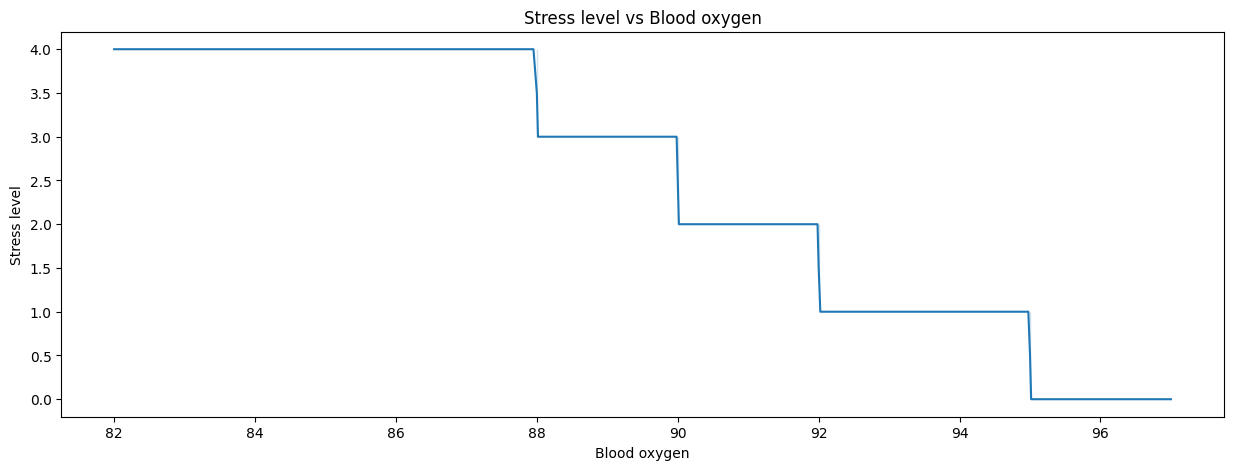

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(x='bo',y='sl',data=SleepStress)
plt.title('Stress level vs Blood oxygen')
plt.ylabel('Stress level')
plt.xlabel('Blood oxygen')#血氧
plt.show()

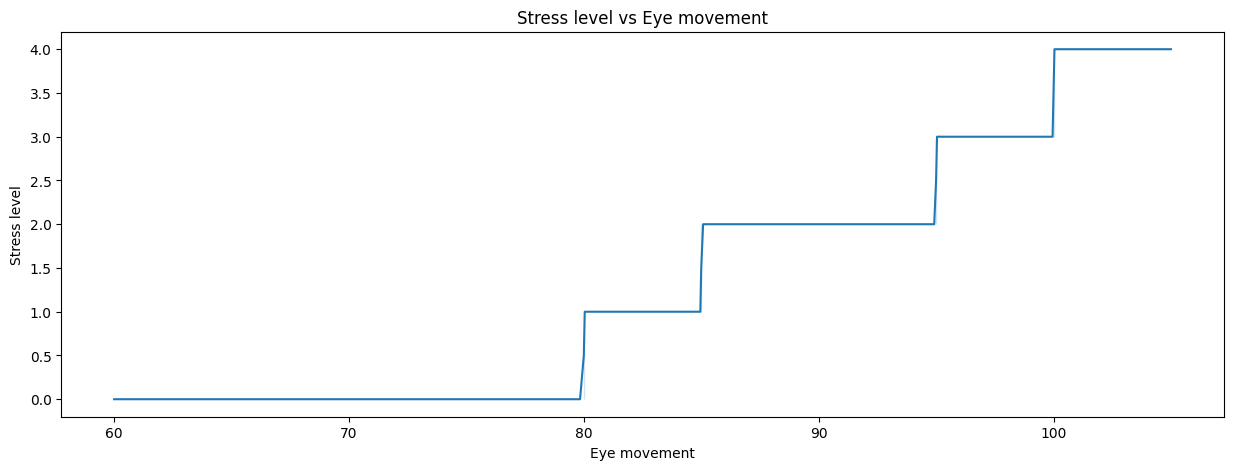

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x='rem',y='sl',data=SleepStress)
plt.title('Stress level vs Eye movement')
plt.ylabel('Stress level')
plt.xlabel('Eye movement')#眼球運動
plt.show()

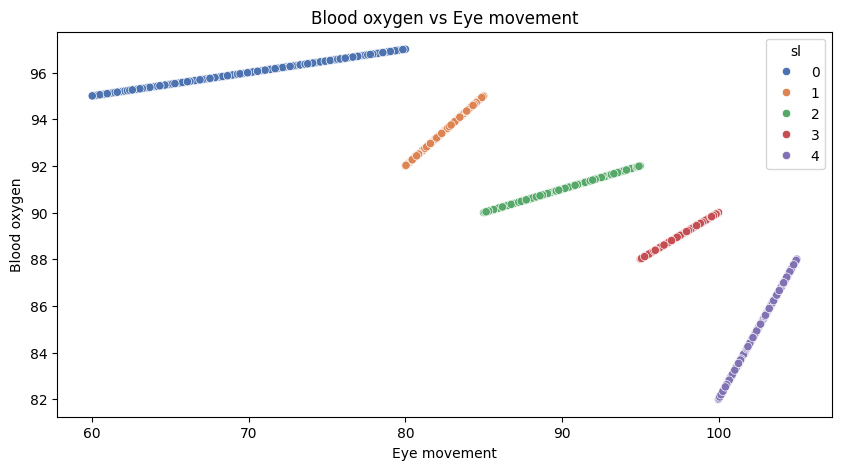

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='bo',x='rem',data=SleepStress,hue='sl',palette='deep')
plt.title('Blood oxygen vs Eye movement')
plt.ylabel('Blood oxygen')#血氧
plt.xlabel('Eye movement')#眼球運動
plt.show()

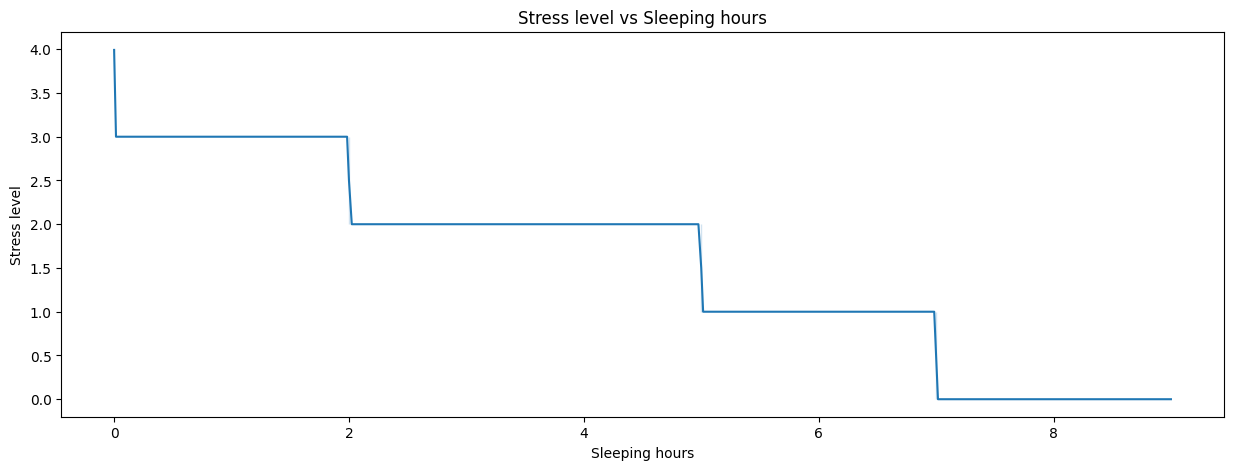

In [17]:
plt.figure(figsize=(15,5))
sns.lineplot(x='sr.1',y='sl',data=SleepStress)
plt.title('Stress level vs Sleeping hours')
plt.ylabel('Stress level')
plt.xlabel('Sleeping hours')#時長
plt.show()

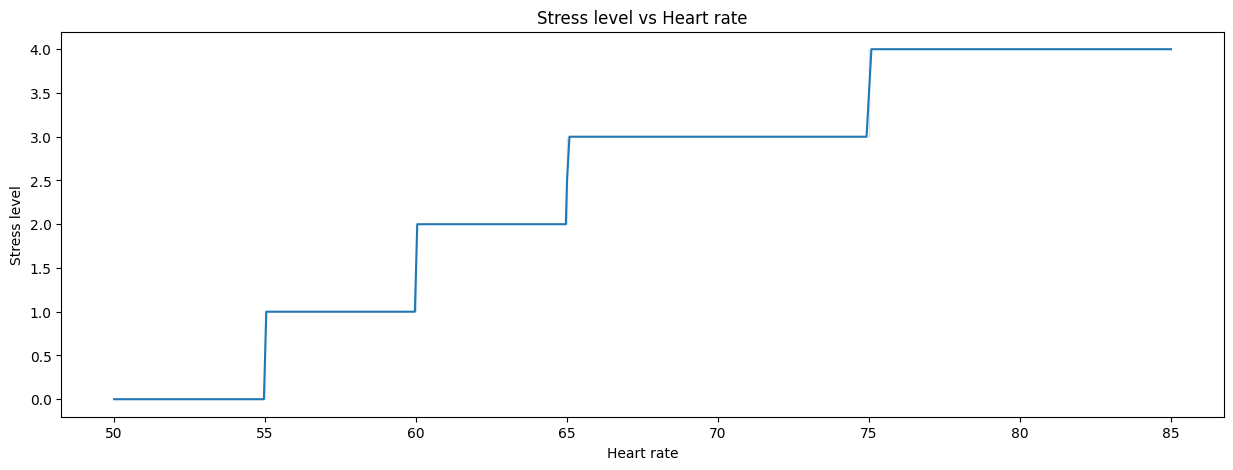

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(x='hr',y='sl',data=SleepStress)
plt.title('Stress level vs Heart rate')
plt.ylabel('Stress level')
plt.xlabel('Heart rate')#心律
plt.show()


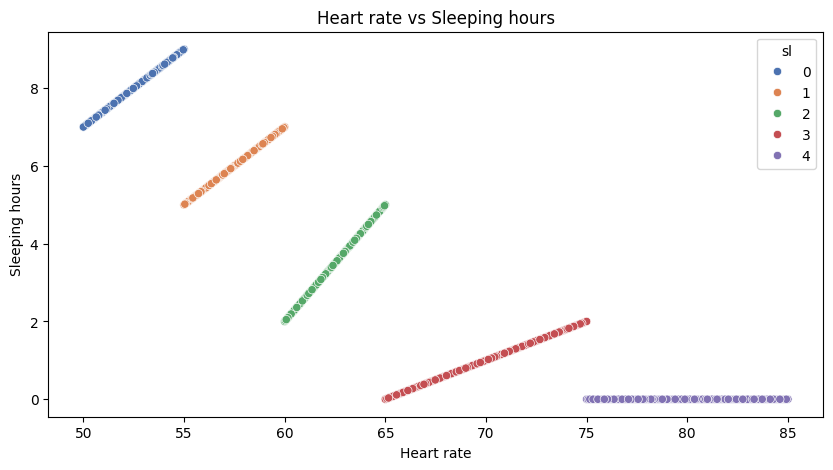

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='sr.1',x='hr',data=SleepStress,hue='sl',palette='deep')
plt.title('Heart rate vs Sleeping hours')
plt.ylabel('Sleeping hours')#時長
plt.xlabel('Heart rate')#心律
plt.show()

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
Stress_Levels = ['Low','Medium Low','Medium','Medium High','High']
Feature_Importance = pd.DataFrame()
for i in range(0,5):
    SleepStress_Pred = SleepStress.copy()
    SleepStress_Pred['sl'] = SleepStress_Pred['sl'].apply(lambda x: 1 if x==i else 0)
    X = SleepStress_Pred.drop('sl',axis=1)
    y = SleepStress_Pred['sl']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=100)
    
    Model = RandomForestClassifier(random_state=100,n_jobs=-1)
    
    params = {'n_estimators':[200],
              'min_samples_leaf':[2,5,10,20,30],
              'max_depth':[2,3,5,10,12,15,20],
              'max_features':[0.1,0.15,0.2,0.25,0.3,0.35,0.4]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[Stress_Levels[i]] = Model_best.feature_importances_

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Train Accuracy : 1.0
Test Accuracy : 0.996031746031746
Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Train Accuracy : 1.0
Test Accuracy : 0.996031746031746
Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Train Accuracy : 1.0
Test Accuracy : 1.0


In [22]:
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head(10)

,Low,Medium Low,Medium,Medium High,High
Feature,,,,,
sr,0.145296,0.155891,0.157659,0.154922,0.145513
rr,0.095127,0.129119,0.140964,0.126856,0.094882
t,0.129560,0.112124,0.105295,0.111128,0.130507
lm,0.140109,0.102534,0.090010,0.107155,0.139459
bo,0.139725,0.130867,0.127002,0.131251,0.140439
rem,0.115203,0.116448,0.120052,0.116508,0.114559
sr.1,0.144806,0.144293,0.143660,0.142555,0.144414
hr,0.090174,0.108723,0.115359,0.109625,0.090226


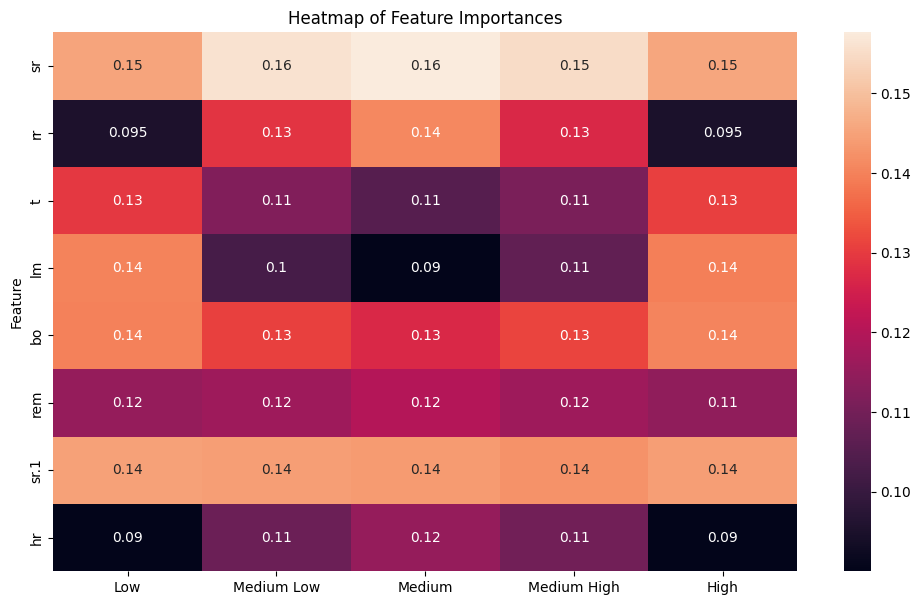

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(Feature_Importance,annot=True)
plt.title('Heatmap of Feature Importances')#特徵重要性熱圖
plt.show()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
Stress_Levels = ['Low','Medium Low','Medium','Medium High','High']
Feature_Importance = pd.DataFrame()
for i in range(0,5):
    SleepStress_Pred = SleepStress.copy()
    SleepStress_Pred['sl'] = SleepStress_Pred['sl'].apply(lambda x: 1 if x==i else 0)
    X = SleepStress_Pred.drop('sl',axis=1)
    y = SleepStress_Pred['sl']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=100)
    
    Model = GradientBoostingClassifier(random_state=100)
    
    params = {'learning_rate':[0.1,0.2,0.3,0.4],
              'min_samples_leaf':[2,5,10,20,30],
              'max_depth':[3,5,10,12,15,20],
              'max_features':[0.1,0.2,0.3,0.4]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[Stress_Levels[i]] = Model_best.feature_importances_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


Train Accuracy : 1.0
Test Accuracy : 0.996031746031746
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Train Accuracy : 1.0
Test Accuracy : 0.996031746031746
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Train Accuracy : 1.0
Test Accuracy : 0.996031746031746
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Train Accuracy : 1.0
Test Accuracy : 0.996031746031746
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Train Accuracy : 1.0
Test Accuracy : 1.0


In [26]:
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head(10)

,Low,Medium Low,Medium,Medium High,High
Feature,,,,,
sr,0.065245,0.064949,0.065519,0.074346,0.063935
rr,0.201806,0.091931,0.034388,0.098012,0.198420
t,0.052815,0.159217,0.302556,0.153312,0.054347
lm,0.109107,0.029865,0.057531,0.046465,0.107321
bo,0.184799,0.134968,0.090150,0.185951,0.192287
rem,0.022055,0.003656,0.081957,0.048370,0.021683
sr.1,0.314877,0.508313,0.302929,0.322217,0.313431
hr,0.049295,0.007100,0.064969,0.071326,0.048575


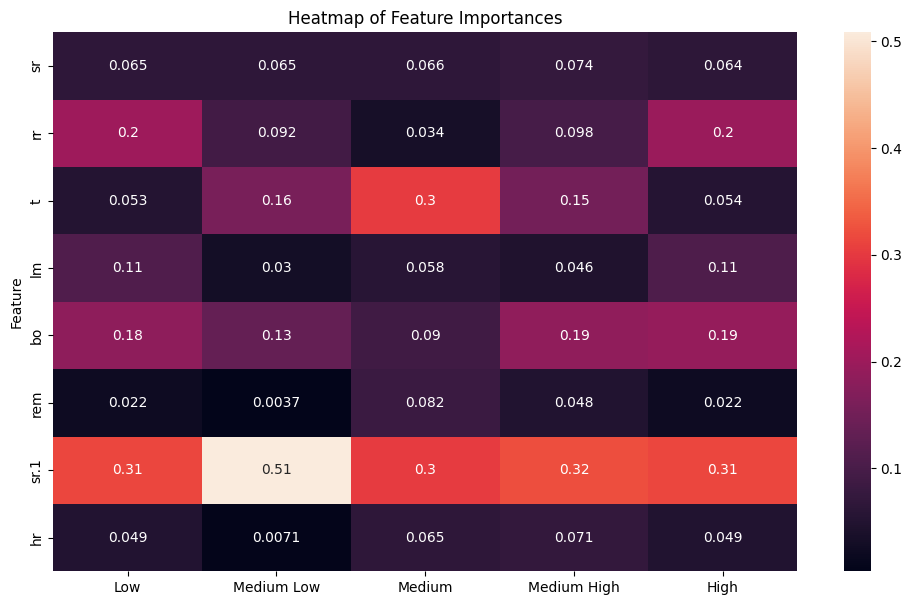

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(Feature_Importance,annot=True)
plt.title('Heatmap of Feature Importances')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
from sklearn.linear_model import RidgeClassifier

In [31]:
Stress_Levels = ['Low','Medium Low','Medium','Medium High','High']
Feature_Coefficients = pd.DataFrame()
for i in range(0,5):
    SleepStress_Pred = SleepStress.copy()
    SleepStress_Pred['sl'] = SleepStress_Pred['sl'].apply(lambda x: 1 if x==i else 0)
    X = SleepStress_Pred.drop('sl',axis=1)
    y = SleepStress_Pred['sl']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=100)
    
    X_train = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train,columns=X.columns)
    
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=X.columns)
    
    Model = RidgeClassifier(random_state=100)
    
    params = {'alpha':[10000,1000,100, 10, 1.0, 0.1, 0.01,0.001,0.0001]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
    
    Feature_Coefficients['Feature'] = X_train.columns
    Feature_Coefficients[Stress_Levels[i]] = Model_best.coef_[0]

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits


Train Accuracy : 0.8677248677248677
Test Accuracy : 0.8452380952380952
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 1.0
Test Accuracy : 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 1.0
Test Accuracy : 1.0


In [32]:
Feature_Coefficients.set_index('Feature',inplace=True)
Feature_Coefficients.head(10)

,Low,Medium Low,Medium,Medium High,High
Feature,,,,,
sr,1.096322,-2.543090,0.569852,0.992567,-0.031885
rr,0.395523,-0.571429,0.875648,-0.526050,0.211914
t,4.252581,-6.913676,2.474411,0.425414,-0.193072
lm,-0.501558,2.465565,-4.386836,0.280677,0.086025
bo,-3.872764,6.250650,-2.702527,0.608886,-0.206455
rem,-1.640355,1.049534,1.998222,-0.022249,-0.164038
sr.1,-0.014030,0.763977,0.100561,-1.114164,0.139431
hr,0.395523,-0.571429,0.875648,-0.526050,0.211914


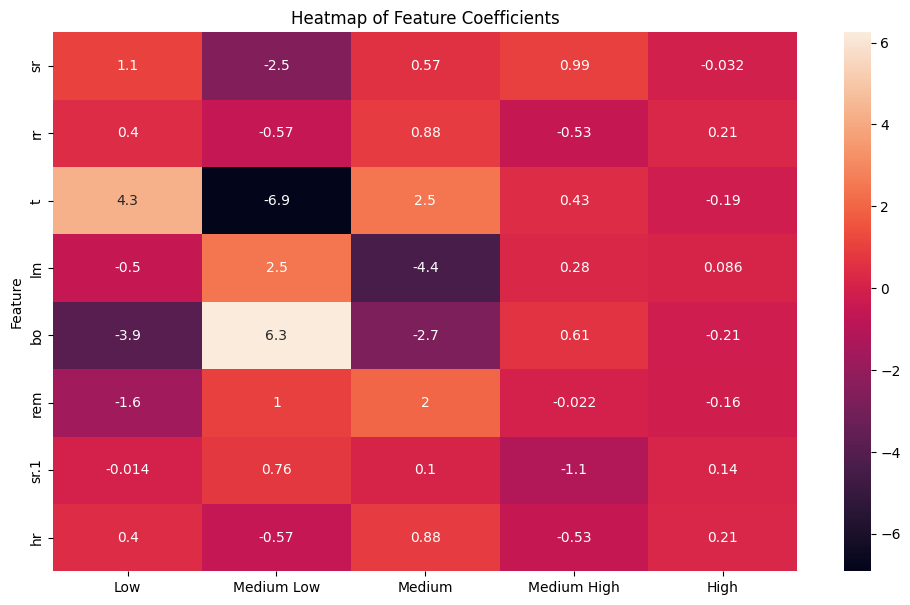

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(Feature_Coefficients,annot=True)
plt.title('Heatmap of Feature Coefficients')
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print()
print('整體正確率:',accuracy_score(y_test, y_pred).round(2))

     預測1  預測2
實際1  200    0
實際2    0   52

整體正確率: 1.0


In [57]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00        52

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [58]:
y_test_proba = model_pl.predict_proba(X_test.iloc[:5])
pd.DataFrame(y_test_proba, columns=['預測1的機率', '預測2的機率'])

,預測1的機率,預測2的機率
0,0.999882,0.000118
1,0.999817,0.000183
2,0.937483,0.062517
3,0.040419,0.959581
4,0.999847,0.000153


In [59]:
y_pred_proba = model_pl.predict_proba(X_test)[:,1]
y_pred_8 = np.where(y_pred_proba>=0.8, 2, 1)
y_pred_8[:5]

array([1, 1, 1, 2, 1])

In [65]:
import numpy as np

# 假設模型預測的概率值為 y_test_prob
# y_test_prob = model.predict_proba(X_test)[:, 1]

# 假設閾值的範圍是0到1，每隔0.1取一個值
thresholds = np.arange(0, 1.1, 0.1)

# 初始化列表以存儲結果
precision_values = []
recall_values = []

# 遍歷閾值
for threshold in thresholds:
    y_test_pred_threshold = (y_test_prob > threshold).astype(int)
    
    precision = precision_score(y_test, y_test_pred_threshold, average='weighted')
    recall = recall_score(y_test, y_test_pred_threshold, average='weighted')
    
    precision_values.append(precision)
    recall_values.append(recall)

# 創建 DataFrame 存儲閾值、精確度和召回率
threshold_metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_values,
    'Recall': recall_values
})

# 輸出表格
print(threshold_metrics_df)


    Threshold  Precision    Recall
0         0.0   1.000000  1.000000
1         0.1   1.000000  1.000000
2         0.2   1.000000  1.000000
3         0.3   1.000000  1.000000
4         0.4   1.000000  1.000000
5         0.5   1.000000  1.000000
6         0.6   1.000000  1.000000
7         0.7   0.996051  0.996032
8         0.8   0.996051  0.996032
9         0.9   0.996051  0.996032
10        1.0   0.629882  0.793651
